In [1]:
import functions
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_hypnogram(hypno_str, ax = None):
    """
    Description
    -----------
    This function plot a hypnogram with same design as the Oura Ring sleep stage dashboard.

    Parameters
    ----------
    hypno_str : <str>
        A string that contains one character for each starting five minutes of the sleep period, so that the first period starts from sleep.bedtime.start
        '1'= deep (N3) sleep, '2'= light (N1 or N2) sleep, '3'= REM sleep, '4'= awake    

    Returns
    -------
    ax : <class 'matplotlib.axes._subplots.AxesSubplot'>
        Plotted hypnogram with integer index in the x-axis.
    """
    
    # Values changed to: '3'= deep (N3) sleep, '2'= light (N1 or N2) sleep, '1'= REM sleep, '0' = awake
    hypno = pd.Series([int(elem) for elem in hypno_str]).map({1: 3, 2: 2, 3: 1, 4: 0}).values
    
    # Sampling frequency of the hypnogram
    sf_hypno= 1/(5*60)
    bins = np.arange(hypno.size + 1) / (sf_hypno * 3600)
    
    # Take the points where there is a change of state
    change_points = np.nonzero(np.ediff1d(hypno, to_end=1))
    bins = np.append(0, bins[change_points])

    # Take the right edges of the hypnogram 
    hypno = hypno[change_points]
    
    # Split the data into each state with the corresponding collor
    hypno_split = []
    hypno_split.append((np.ma.masked_not_equal(hypno, 0), "#d1d5db")) # Hypno Awake
    hypno_split.append((np.ma.masked_not_equal(hypno, 1), "#72ccff")) # Hypno REM
    hypno_split.append((np.ma.masked_not_equal(hypno, 2), "#448dc2")) # Hypno N1 & N2
    hypno_split.append((np.ma.masked_not_equal(hypno, 3), "#24477b")) # Hypno N3
    
    # Start the plot
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=(7, 3), constrained_layout=True)
        ax = plt.gca()
    
    # Draw Hypnogram lines
    for i, stage in enumerate(hypno_split):
        ax.hlines(-1 * stage[0], xmin=bins[:-1], xmax=bins[1:], color=stage[1], lw=30)
        ax.axhline(y=-(i + 0.5), xmin=0, xmax=1, lw=0.5, color='black',linestyle='-.')
        
    # Adjust Global parameters
    ax.set_yticks([0, -1, -2, -3])
    ax.set_yticklabels(["Awake", "REM", "N1/N2", "N3"])
    ax.set_ylim(-3.5, 0.5)
    ax.set_xlim(0, bins.max())
    ax.set_ylabel("Stage")
    ax.set_xlabel("Time [hrs]")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)    

    return ax

/home/igor/anaconda3/envs/generic-env/lib/python3.10/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


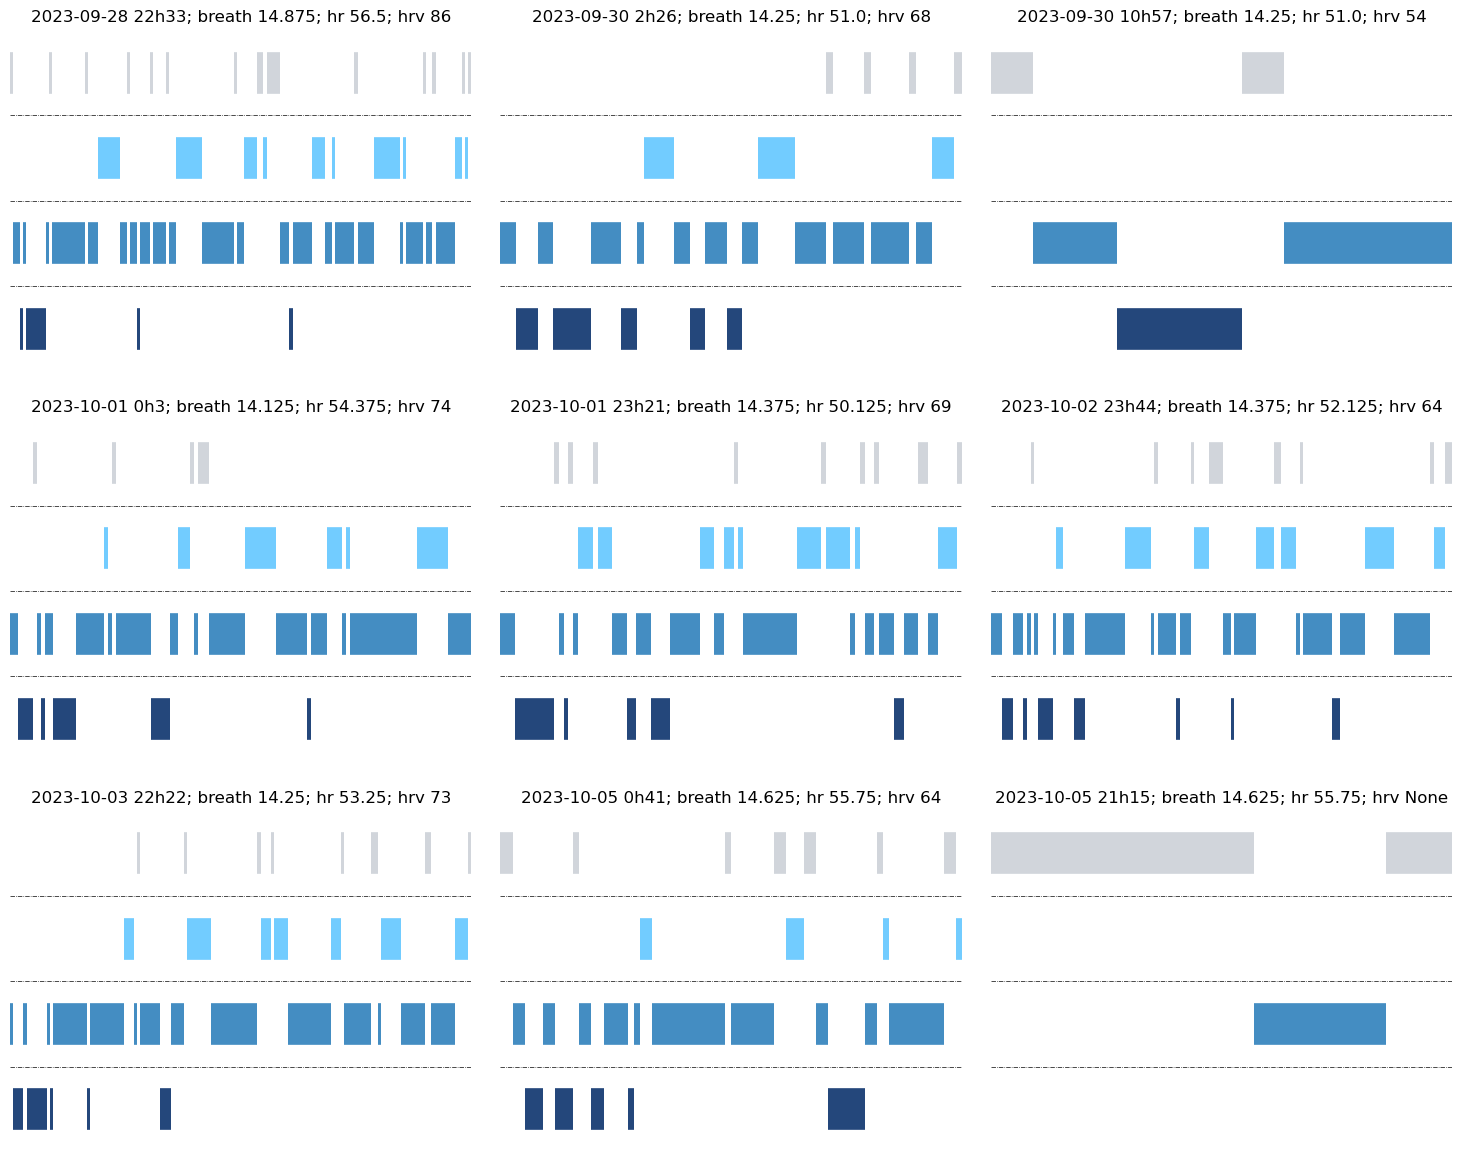

In [4]:
sleep_data, heart_data = functions.data_request(start = '2023-09-29', end = '2023-10-09')

# Define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

i = 0
for row in axs:
    for column in row:
    
        data = sleep_data.json()['data'][i]
        hypno_str = data['sleep_phase_5_min']
        ax = get_hypnogram(hypno_str, column)
        
        avg_breath = data['average_breath']
        avg_hr = data['average_heart_rate']
        avg_hrv = data['average_hrv']
        start = datetime.datetime.strptime(data['bedtime_start'], "%Y-%m-%dT%H:%M:%S%z")

        ax.set_title(f'{start.date()} {start.hour}h{start.minute}; breath {avg_breath}; hr {avg_hr}; hrv {avg_hrv}')
        ax.set_axis_off()
        i += 1

plt.tight_layout(pad=2.08)   
plt.show()

In [5]:
sleep_batch = []

for data in sleep_data.json()['data']:
    if len(day_data['sleep_phase_5min']) > 40:
        
        
        
        

SyntaxError: incomplete input (3504614250.py, line 8)

# Get the acelerometer data

In [6]:
sleep_data.json()['data'][6]

{'id': '0b7bf708-92be-415a-902a-cb91d067777c',
 'average_breath': 14.25,
 'average_heart_rate': 53.25,
 'average_hrv': 73,
 'awake_time': 3780,
 'bedtime_end': '2023-10-04T09:53:29-03:00',
 'bedtime_start': '2023-10-03T22:22:29-03:00',
 'day': '2023-10-04',
 'deep_sleep_duration': 4080,
 'efficiency': 91,
 'heart_rate': {'interval': 300.0,
  'items': [None,
   49.0,
   50.0,
   50.0,
   50.0,
   50.0,
   50.0,
   51.0,
   51.0,
   51.0,
   52.0,
   52.0,
   52.0,
   52.0,
   52.0,
   51.0,
   52.0,
   53.0,
   51.0,
   52.0,
   51.0,
   50.0,
   49.0,
   47.0,
   48.0,
   47.0,
   50.0,
   48.0,
   48.0,
   51.0,
   48.0,
   48.0,
   49.0,
   49.0,
   48.0,
   51.0,
   52.0,
   50.0,
   50.0,
   None,
   46.0,
   None,
   44.0,
   47.0,
   46.0,
   47.0,
   48.0,
   48.0,
   48.0,
   46.0,
   46.0,
   45.0,
   46.0,
   50.0,
   54.0,
   57.0,
   52.0,
   50.0,
   51.0,
   48.0,
   47.0,
   49.0,
   49.0,
   50.0,
   50.0,
   50.0,
   46.0,
   47.0,
   48.0,
   49.0,
   49.0,
   49.0,
 

In [7]:
mov = sleep_data.json()['data'][6]['movement_30_sec']
hypno_str = sleep_data.json()['data'][6]['sleep_phase_5_min']
hypno = pd.Series([int(elem) for elem in hypno_str]).map({1: 'Deep', 2: 'Light', 3: 'REM', 4: 'Awake'}).values

In [58]:
acc_list = []

for day in sleep_data.json()['data']:
    
    mov = day['movement_30_sec']
    hypno_str = day['sleep_phase_5_min']
    hypno = pd.Series([int(elem) for elem in hypno_str]).map({1: 'Deep', 2: 'Light', 3: 'REM', 4: 'Awake'}).values
    
    count = 0
    for i in range(1,len(mov),10):
        
        acc = mov[i:i+10]
        
        if len(acc) == 10:
            mov_sum = sum(int(a) for a in acc)
            acc_list.append((acc, mov_sum, hypno[count], count))
            
        count+=1   

In [66]:
acc_list[0]

('1222111121', 14, 'Awake', 0)

In [59]:
def phase_analysis(acc_list, label):
    
    acc = [elem for elem in acc_list if elem[2]==label and elem[3] > 1]
    acc_sum = [a[1] for a in acc]

    print(f'Avg: {round(np.average(acc_sum),2)}')
    print(f'Min: {np.min(acc_sum)}')
    print(f'Max: {np.max(acc_sum)}')
    
    print(f'1st Quartile: {np.percentile(acc_sum, 25)}')
    print(f'Median: {np.median(acc_sum)}')
    print(f'3st Quartile: {np.percentile(acc_sum, 75)}')
    print(f'Std: {round(np.std(acc_sum),2)}')

    diff = np.max(acc_sum) - np.min(acc_sum)
    plt.hist(acc_sum,bins=diff)
    plt.show()
    
    return acc

Avg: 14.49
Min: 10
Max: 33
1st Quartile: 12.0
Median: 13.0
3st Quartile: 16.0
Std: 4.64


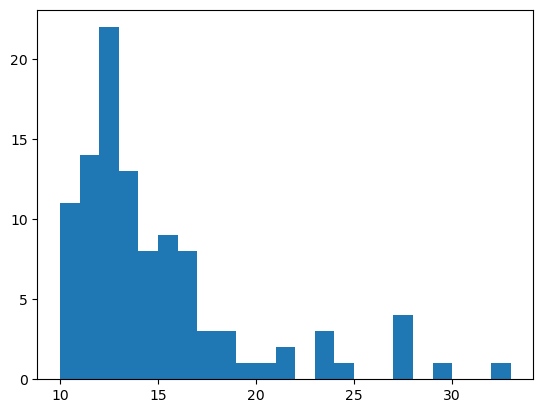

In [60]:
acc_awake = phase_analysis(acc_list, 'Awake')

Avg: 13.47
Min: 10
Max: 22
1st Quartile: 12.0
Median: 13.0
3st Quartile: 14.0
Std: 1.94


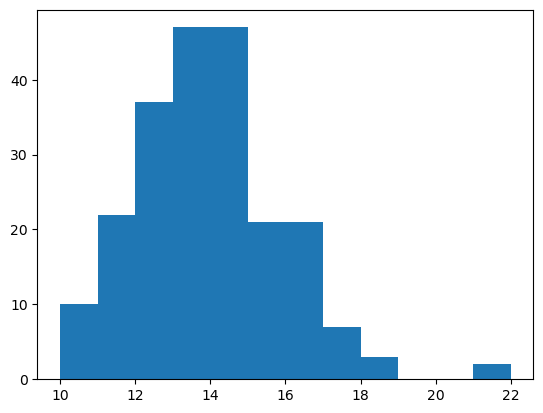

In [61]:
awake_rem = phase_analysis(acc_list, 'REM')

Avg: 11.72
Min: 10
Max: 30
1st Quartile: 10.0
Median: 11.0
3st Quartile: 13.0
Std: 2.14


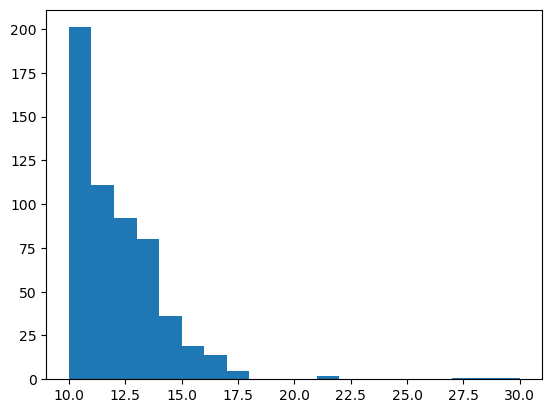

In [62]:
acc_light = phase_analysis(acc_list, 'Light')

Avg: 11.11
Min: 10
Max: 17
1st Quartile: 10.0
Median: 10.0
3st Quartile: 12.0
Std: 1.62


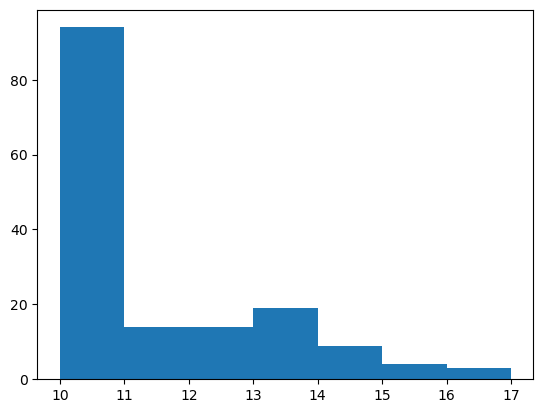

In [63]:
acc_deep = phase_analysis(acc_list, 'Deep')

In [64]:
acc_light

[('1111112112', 12, 'Light', 2),
 ('1111111111', 10, 'Light', 3),
 ('1112111111', 11, 'Light', 5),
 ('1111111122', 12, 'Light', 12),
 ('2211111111', 12, 'Light', 14),
 ('1122211211', 14, 'Light', 15),
 ('1211112132', 15, 'Light', 16),
 ('1111111111', 10, 'Light', 17),
 ('1111122111', 12, 'Light', 18),
 ('1111113112', 13, 'Light', 19),
 ('1232122111', 16, 'Light', 20),
 ('1111111111', 10, 'Light', 21),
 ('1111111111', 10, 'Light', 22),
 ('1112111133', 15, 'Light', 23),
 ('1231111222', 16, 'Light', 25),
 ('2121112222', 16, 'Light', 26),
 ('2211211111', 13, 'Light', 27),
 ('1111111111', 10, 'Light', 35),
 ('1111111111', 10, 'Light', 36),
 ('1111111111', 10, 'Light', 38),
 ('1111111111', 10, 'Light', 39),
 ('1221111111', 12, 'Light', 41),
 ('1111111111', 10, 'Light', 42),
 ('1111111111', 10, 'Light', 43),
 ('1112211121', 13, 'Light', 45),
 ('1111111111', 10, 'Light', 46),
 ('1111111111', 10, 'Light', 47),
 ('1111111113', 12, 'Light', 48),
 ('1121111111', 11, 'Light', 50),
 ('1222111121', 1